In [1]:
import csv
import numpy as np
from scipy.integrate import quad
from numpy import *
from scipy import *

amuExp = 1165920715e-12 #116592089E-11 #
amuThe = 116592033e-11 #116591810e-11
amu = amuExp-amuThe
ErramuExp = 22e-11
ErramuThe = 43e-11
Eamu = np.sqrt(ErramuExp**2 + ErramuThe**2)
amu_up = amu+Eamu
amu_central = amu
amu, Eamu, amu_up, amu_central

import mplhep as hep 
hep.style.use(hep.style.ATLAS)


In [2]:
# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
linestyle_str = [
    ('solid', 'solid'), # Same as (0, ()) or '-'
    ('dotted', '.'),    # Same as (0, (1, 1)) or '.'
    ('dashed', '--'),   # Same as '--'
    ('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
from  matplotlib import *
import mplhep as hep 
hep.style.use(hep.style.ATLAS)
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9,6)
import matplotlib.patheffects as pe
# Global Parameters in GeV units
m_mu = 0.105  # Muon mass
# Experimental Bounds
bound_current_eup = [(x, amu_up) for x in range(0, 100000)]
bound_current_central = [(x, amu_central) for x in range(0, 100000)]
sigma_current = [(x, Eamu) for x in range(1, 100000)]
#sigma_projected = [(x, 34e-11) for x in range(1, 100000)]


In [3]:
m_mu = 0.105  # masa del muón

epsilon_1 = m_mu/m_mu 

def lambda1_func(m_mu, mphi):
    return m_mu / mphi

def integrand(x, epsilon_1, lambda1, sign=1):
    return (x**2 * (1 + sign*epsilon_1 - x)) / ((1 - x) * (1 - lambda1**2 * x) + epsilon_1**2 * lambda1**2 * x)

def compute_delta(mphi, m_mu, lambda22):
    gs1 = lambda22 / 2
    gp1 = gs1
    lambda1_val = lambda1_func(m_mu, mphi)
    integral_pos, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, 1))
    integral_neg, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, -1))
    term1 = (gs1**2 * m_mu**2) / (8 * np.pi**2 * mphi**2) * integral_pos
    term2 = (gp1**2 * m_mu**2) / (8 * np.pi**2 * mphi**2) * integral_neg
    return term1 + term2

mphi_range = np.linspace(1, 10000, 2000)


results = {}
for lambda22 in [1.0, 0.1]:
    DamPhi = [compute_delta(mphi, m_mu, lambda22) for mphi in mphi_range]
    results[lambda22] = DamPhi


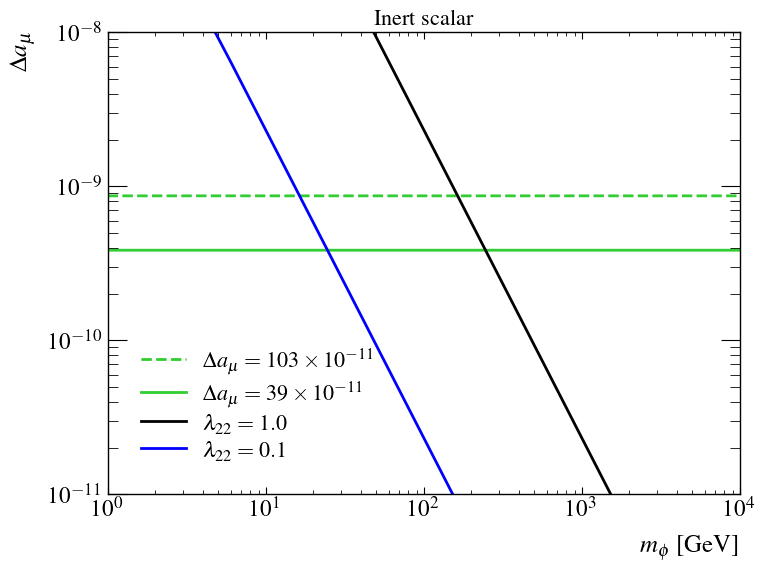

In [4]:
mpl.rcParams['figure.figsize'] = (8,6)

pek2=[pe.Stroke(linewidth=1.9, foreground='k',alpha=0.5), pe.Normal()]
pek1=[pe.Stroke(linewidth=1, foreground='limegreen',alpha=0.8), pe.Normal()]

x = mphi_range  
BoundCurrenteup = np.full_like(x, amu_up)
BoundCurrentdown = np.full_like(x, amu_central)

plt.plot(x, BoundCurrenteup,'limegreen',linestyle = '--',linewidth=2,markersize=0.0,zorder=0.5,path_effects=pek1,label=r'$\Delta  a_{\mu} = 103\times 10^{-11}$')
plt.plot(x, BoundCurrentdown,'limegreen',linestyle = 'solid',linewidth=2,markersize=0.0,zorder=0.5,path_effects=pek1, label=r'$\Delta  a_{\mu} = 39\times 10^{-11}$')

colors = {1.0: 'k', 0.1: 'b'}
labels = {1.0: r'$\lambda_{22}=1.0$', 0.1: r'$\lambda_{22}=0.1$'}

for lambda22 in [1.0, 0.1]:
    plt.plot(mphi_range, results[lambda22], color=colors[lambda22], linewidth=2, label=labels[lambda22])


plt.xlim([1e00,1e04])
plt.ylim([10**(-11),10**(-8)])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$m_{\phi}$ [GeV]',loc="right",fontsize=18)
plt.ylabel(r'$\Delta a_{\mu} $',loc='top', fontsize=18) 
plt.legend(loc='lower left', shadow=False, fontsize=16,frameon=False,ncol=1)
plt.title(r'Inert scalar',fontsize=16)
plt.savefig('InertScalarg2.pdf', format='pdf', bbox_inches='tight')
#plt.draw()
plt.show()

